# 기계학습 각각변수들의 관계를 찾는 과정
- 예측:회귀분석
- 분류:knn 
- 군집:Kmeans
- 머신러닝 프로세스 -> 데이터 분리 -> 알고리즘 준비-> 모형학습 -> 예측 -> 평가 -> 활용

In [1]:
# 회귀분석 : 가격, 매출, 주가 등 연속성 데이터 예측 알고리즘
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('auto-mpg.csv', header = None)
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower','weight','acceleration', 'model year', 'origin', 'name']
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [2]:
print(df.info())
print(df.describe())
print(df.horsepower.unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None
              mpg   cylinders  displacement       weight  acceleration  \
count  398.000000  398.000000    398.000000   398.000000    398.000000   
mean    23.514573    5.454774    193.425879  2970.424623     15.568090   
std      7.815984    1.701004    104.269838   846.841774      2.757689   
min      9.000000    3.000000     68.000000  1613.000000   

In [3]:
# df.loc[df['horsepower']=='?','horsepower']
df['horsepower'].replace('?', np.nan, inplace = True)
print(df.horsepower.unique())

['130.0' '165.0' '150.0' '140.0' '198.0' '220.0' '215.0' '225.0' '190.0'
 '170.0' '160.0' '95.00' '97.00' '85.00' '88.00' '46.00' '87.00' '90.00'
 '113.0' '200.0' '210.0' '193.0' nan '100.0' '105.0' '175.0' '153.0'
 '180.0' '110.0' '72.00' '86.00' '70.00' '76.00' '65.00' '69.00' '60.00'
 '80.00' '54.00' '208.0' '155.0' '112.0' '92.00' '145.0' '137.0' '158.0'
 '167.0' '94.00' '107.0' '230.0' '49.00' '75.00' '91.00' '122.0' '67.00'
 '83.00' '78.00' '52.00' '61.00' '93.00' '148.0' '129.0' '96.00' '71.00'
 '98.00' '115.0' '53.00' '81.00' '79.00' '120.0' '152.0' '102.0' '108.0'
 '68.00' '58.00' '149.0' '89.00' '63.00' '48.00' '66.00' '139.0' '103.0'
 '125.0' '133.0' '138.0' '135.0' '142.0' '77.00' '62.00' '132.0' '84.00'
 '64.00' '74.00' '116.0' '82.00']


In [4]:
# 누락 삭제
df['horsepower'].isnull().sum()
df.dropna( subset = ['horsepower'], axis = 0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    object 
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


In [5]:
pd.set_option('display.max_columns', 10)
print(df.describe())

              mpg   cylinders  displacement       weight  acceleration  \
count  392.000000  392.000000    392.000000   392.000000    392.000000   
mean    23.445918    5.471939    194.411990  2977.584184     15.541327   
std      7.805007    1.705783    104.644004   849.402560      2.758864   
min      9.000000    3.000000     68.000000  1613.000000      8.000000   
25%     17.000000    4.000000    105.000000  2225.250000     13.775000   
50%     22.750000    4.000000    151.000000  2803.500000     15.500000   
75%     29.000000    8.000000    275.750000  3614.750000     17.025000   
max     46.600000    8.000000    455.000000  5140.000000     24.800000   

       model year      origin  
count  392.000000  392.000000  
mean    75.979592    1.576531  
std      3.683737    0.805518  
min     70.000000    1.000000  
25%     73.000000    1.000000  
50%     76.000000    1.000000  
75%     79.000000    2.000000  
max     82.000000    3.000000  


In [6]:
# 문자열 실수형으로 변환
df['horsepower'] = df['horsepower'].astype(float)

In [7]:
# 분석에 활용할 속성 선택, 연비 , 실린더
ndf = df[['mpg','cylinders','horsepower','weight']]
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mpg         392 non-null    float64
 1   cylinders   392 non-null    int64  
 2   horsepower  392 non-null    float64
 3   weight      392 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 15.3 KB


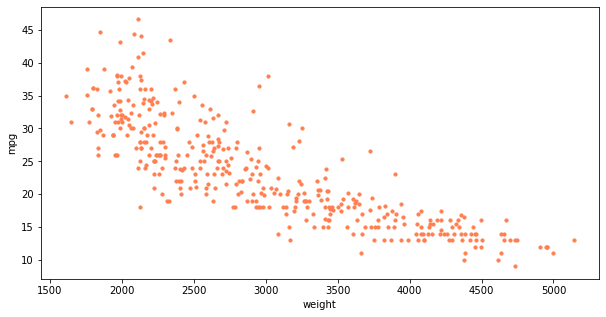

In [8]:
# plt 산점도
ndf.plot(kind='scatter', x = 'weight', y='mpg', c= 'coral', s=10, figsize= (10,5))
plt.show()

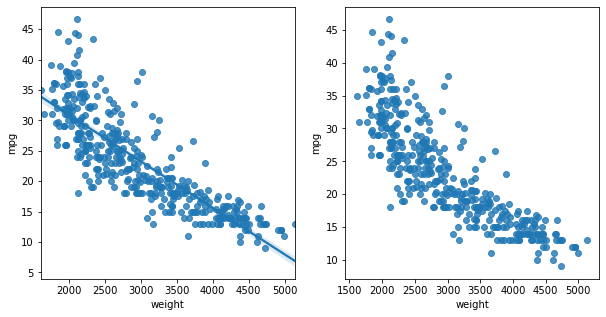

In [9]:
# sns 산점도
fig = plt.figure(figsize = (10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
sns.regplot(x='weight', y='mpg', data =ndf, ax=ax1)
sns.regplot(x='weight', y='mpg', data =ndf, ax=ax2, fit_reg=False) # 회귀선 미표시
plt.show()

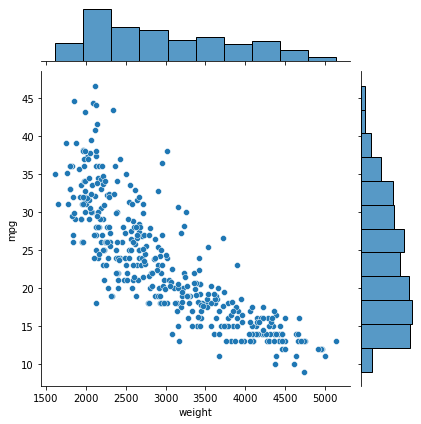

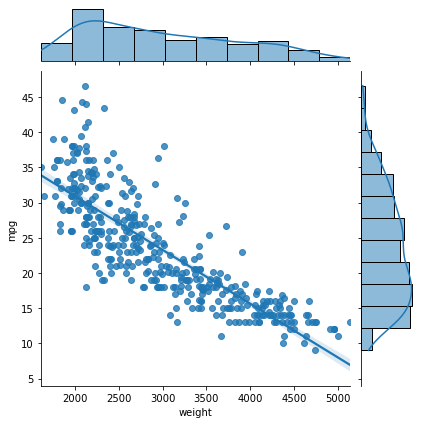

In [10]:
# joinplot
sns.jointplot(x='weight', y='mpg', data =ndf)
sns.jointplot(x='weight', y='mpg', kind = 'reg', data =ndf)
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'shop'

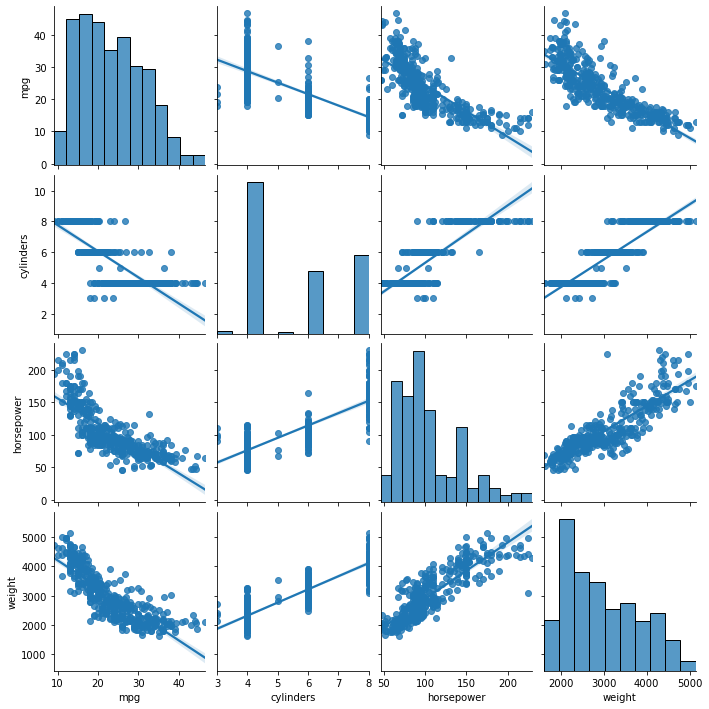

In [11]:
# seaborn pairplot
sns.pairplot(ndf, kind = 'reg')
plt.shop()

In [12]:
# 독립변수 여러개
x = ndf[['weight']]
print(type(x))
# 종속변수 1개
y = ndf['mpg']
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 10)

In [14]:
print(len(x_train))
print(len(y_train))

274
274


In [15]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
#    훈련 독립변수, 정답 종속변수
lr.fit(x_train, y_train)

LinearRegression()

In [16]:
r_square = lr.score(x_test, y_test)
print(r_square)

0.6822458558299325


In [17]:
# 기울기
print('기울기 a', lr.coef_)
print('절편 b', lr.intercept_)

기울기 a [-0.00775343]
절편 b 46.7103662572801


In [18]:
y_hat = lr.predict(x)

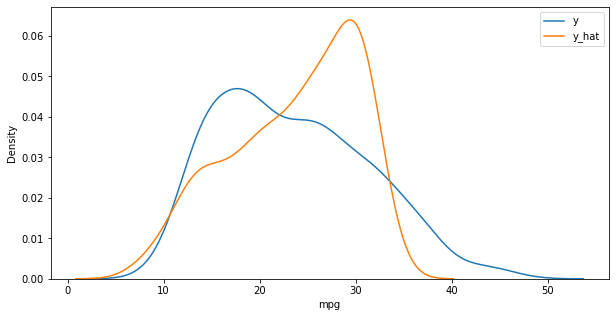

In [19]:
plt.figure(figsize=(10,5))
ax1 = sns.kdeplot(y, label='y')
ax2 = sns.kdeplot(y_hat, label='y_hat', ax=ax1)
plt.legend()
plt.show()

In [ ]:
# 단순회귀분석 : 두변수간 관계를 직선으로 분석
# 다항회귀분석 : 회귀선을 곡선으로 더 높은 정확도

In [22]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
print('원데이터 :', x_train.shape)
print('2차항 변환 데이터 :', x_train_poly.shape)

원데이터 : (274, 1)
2차항 변환 데이터 : (274, 3)


In [24]:
pr = LinearRegression()
pr.fit(x_train_poly, y_train)
x_test_poly = poly.fit_transform(x_test)
r_square = pr.score(x_test_poly, y_test)
y_hat_test = pr.predict(x_test_poly)

In [25]:
print('기울기 a', pr.coef_)
print('절편 b', pr.intercept_)

기울기 a [ 0.00000000e+00 -1.85768289e-02  1.70491223e-06]
절편 b 62.58071221576951


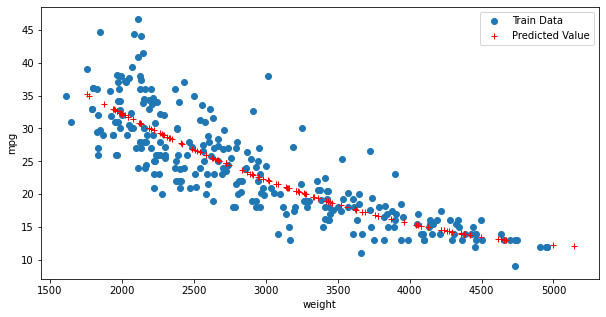

In [26]:
# 산점도 그리기
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
ax.plot(x_train, y_train, 'o', label = 'Train Data')
ax.plot(x_test, y_hat_test, 'r+', label = 'Predicted Value')
ax.legend(loc = 'best')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()

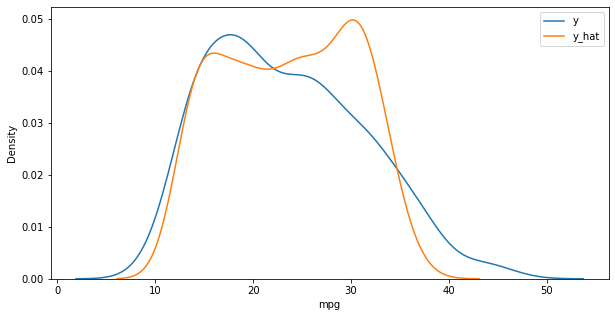

In [28]:
x_poly = poly.fit_transform(x)
y_hat = pr.predict(x_poly)
plt.figure(figsize = (10,5))
ax1 = sns.kdeplot(y, label='y')
ax2 = sns.kdeplot(y_hat, label='y_hat', ax = ax1)
plt.legend()
plt.show()

In [ ]:
# 단순회귀분석 : 독립변수, 종속변수가 한개일때
# 다중 회귀분석 : 독립변수가 여러개일 경우
# y = b + a1*x1 + a2*x2 +...+an*xn

In [29]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
x = ndf[['cylinders', 'horsepower', 'weight']] # 다중회귀분석
y = ndf['mpg']

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 10)

In [33]:
lr.fit(x_train, y_train)
r_square = lr.score(x_test, y_test)
print('결정계수 :', r_square)

결정계수 : 0.6939048496695597


In [34]:
print('기울기 a', lr.coef_)
print('절편 b', lr.intercept_)

기울기 a [-0.60691288 -0.03714088 -0.00522268]
절편 b 46.41435126963407


In [ ]:
y_hat = lr.predict(x_test)

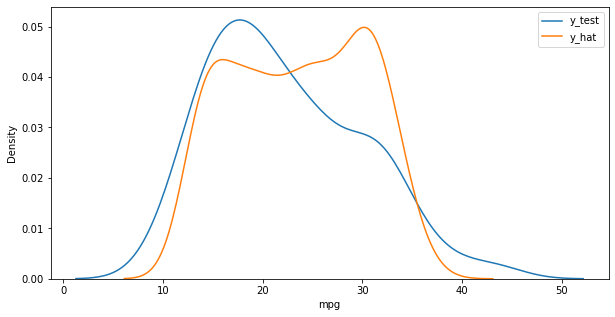

In [36]:

plt.figure(figsize = (10,5))
ax1 = sns.kdeplot(y_test, label='y_test')
ax2 = sns.kdeplot(y_hat, label='y_hat', ax = ax1)
plt.legend()
plt.show()

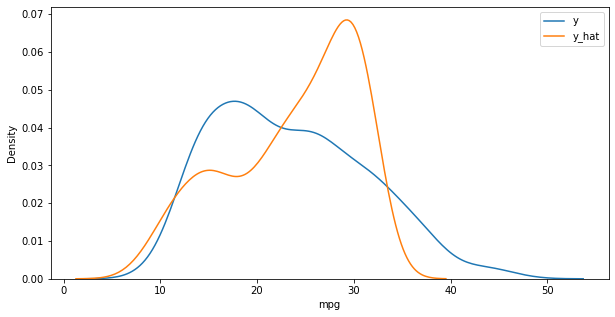

In [37]:
y_hat = lr.predict(x)
plt.figure(figsize = (10,5))
ax1 = sns.kdeplot(y, label='y')
ax2 = sns.kdeplot(y_hat, label='y_hat', ax = ax1)
plt.legend()
plt.show()

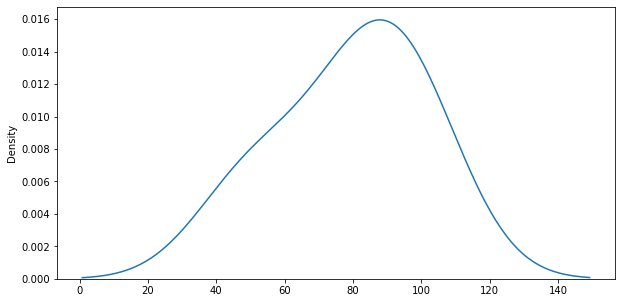

In [40]:
x = [[10], [5], [9], [7]]
y = [100, 50, 90, 77]
lr = LinearRegression()
lr.fit(x,y)
result =lr.predict([[7]])
plt.figure(figsize = (10,5))
ax1 = sns.kdeplot(y, label='y')